In [4]:
import pandas as pd

data = pd.read_csv('Results_21Mar2022.csv', index_col=False)
data.head()

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mc_run_id       72000 non-null  int64  
 1   grouping        72000 non-null  object 
 2   mean_ghgs       72000 non-null  float64
 3   mean_land       72000 non-null  float64
 4   mean_watscar    72000 non-null  float64
 5   mean_eut        72000 non-null  float64
 6   mean_ghgs_ch4   72000 non-null  float64
 7   mean_ghgs_n2o   72000 non-null  float64
 8   mean_bio        72000 non-null  float64
 9   mean_watuse     72000 non-null  float64
 10  mean_acid       72000 non-null  float64
 11  sd_ghgs         72000 non-null  float64
 12  sd_land         72000 non-null  float64
 13  sd_watscar      72000 non-null  float64
 14  sd_eut          72000 non-null  float64
 15  sd_ghgs_ch4     72000 non-null  float64
 16  sd_ghgs_n2o     72000 non-null  float64
 17  sd_bio          72000 non-null 

<Axes: >

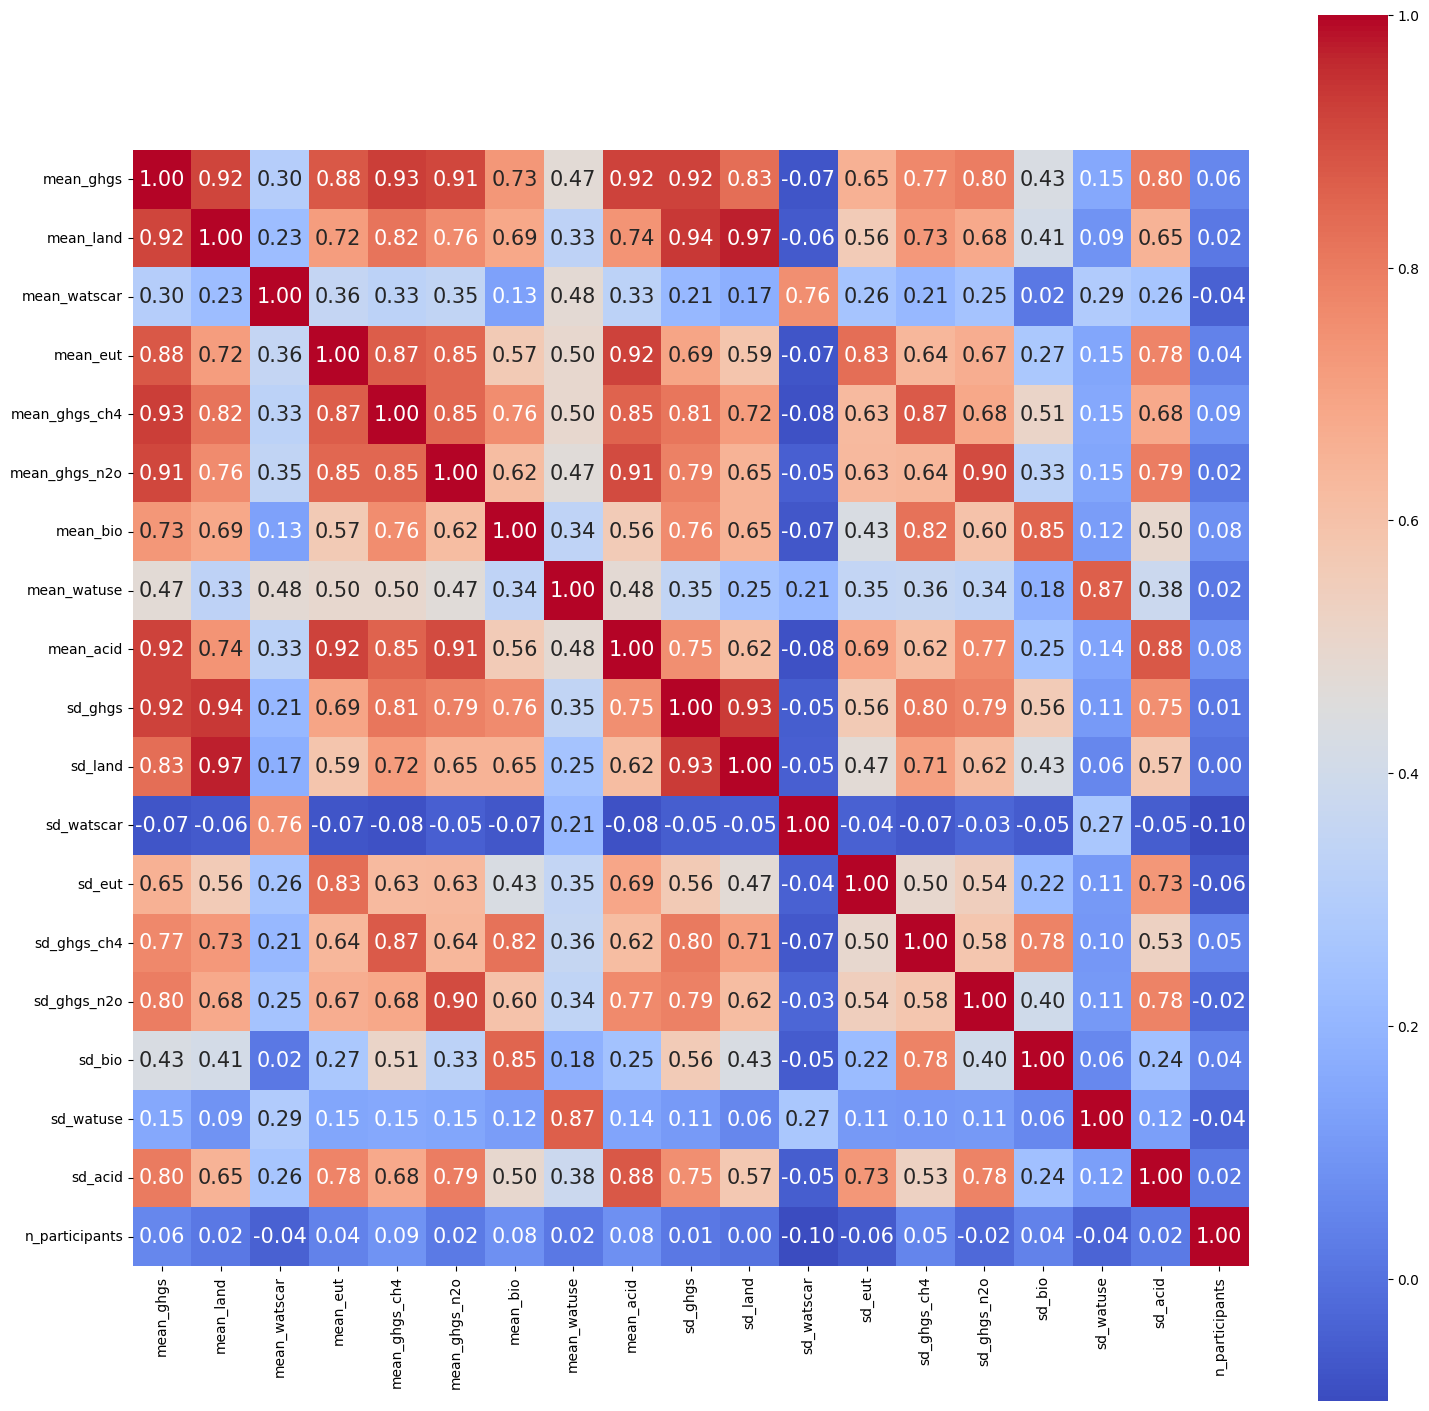

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data['sex'] = data['sex'].map({'female':0,'male':1})
data['diet_group'] = data['diet_group'].map({'meat100':0,'meat50':1,'meat':2,'fish':3,'vegan':4,'veggie':5})
data['age_group'] = data['age_group'].map({'20-29':0,'30-39':1,'40-49':2,'50-59':3,'60-69':4,'70-79':5})
features = list(data.columns[2:21])

corr = data[features].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, xticklabels= features, yticklabels= features, cmap= 'coolwarm')


d:\Python\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Python\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Python\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


<Axes: >

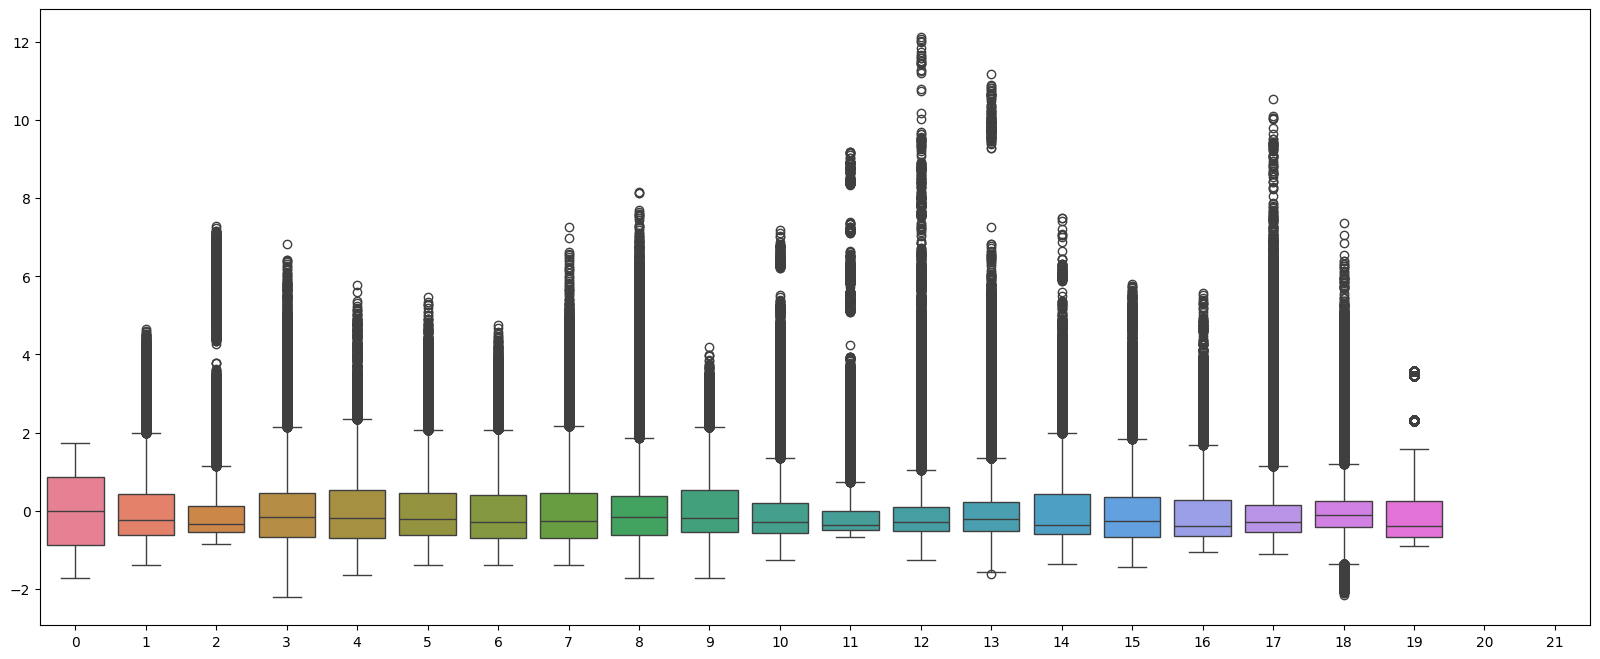

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data['sex'] = data['sex'].map({'female':0,'male':1})
data['diet_group'] = data['diet_group'].map({'meat100':0,'meat50':1,'meat':2,'fish':3,'vegan':4,'veggie':5})
data['age_group'] = data['age_group'].map({'20-29':0,'30-39':1,'40-49':2,'50-59':3,'60-69':4,'70-79':5})
X = data.drop(columns = ['grouping','diet_group'])
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 